####Importing the Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from copy import deepcopy
import plotly.express as px
import torch
# from torchtext.data.utils import get_tokenizer
# from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

####Data Analysis

In [ ]:
df=pd.read_csv('/content/imdb-movies-dataset.csv')
df.head(5)

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [ ]:
df.shape

(10000, 15)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          10000 non-null  object 
 1   Title           10000 non-null  object 
 2   Year            9850 non-null   float64
 3   Certificate     7370 non-null   object 
 4   Duration (min)  9664 non-null   float64
 5   Genre           9993 non-null   object 
 6   Rating          9596 non-null   float64
 7   Metascore       7555 non-null   float64
 8   Director        9995 non-null   object 
 9   Cast            9961 non-null   object 
 10  Votes           9596 non-null   object 
 11  Description     10000 non-null  object 
 12  Review Count    9999 non-null   object 
 13  Review Title    9483 non-null   object 
 14  Review          9484 non-null   object 
dtypes: float64(4), object(11)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,Year,Duration (min),Rating,Metascore
count,9850.000000,9664.000000,9596.000000,7555.000000
mean,2005.761421,108.809603,6.438610,58.068299
std,18.958005,23.159749,1.051412,17.845240
min,1929.000000,45.000000,1.300000,1.000000
25%,1997.000000,95.000000,5.800000,45.500000
50%,2012.000000,105.000000,6.500000,58.000000
75%,2021.000000,118.000000,7.200000,71.000000
max,2025.000000,746.000000,9.700000,100.000000


In [ ]:
df.isna().sum()

,0
Poster,0
Title,0
Year,150
Certificate,2630
Duration (min),336
Genre,7
Rating,404
Metascore,2445
Director,5
Cast,39


####Data Pre-Processing

In [ ]:
df = df.drop(['Poster', 'Description', 'Metascore', 'Review Title', 'Review'], axis=1)
df.head()

,Title,Year,Certificate,Duration (min),Genre,Rating,Director,Cast,Votes,Review Count
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744",166
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248",183
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401",333
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",384
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517",194


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.dropna(inplace=True)
df.shape

(7228, 10)

In [ ]:
print(df.dtypes)

Title              object
Year              float64
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Director           object
Cast               object
Votes              object
Review Count       object
dtype: object


In [ ]:

df["Year"] = df["Year"].astype(int)
df["Review Count"] = df["Review Count"].str.replace(',', '')
df["Review Count"] = df["Review Count"].astype(int)
df["Votes"] = df["Votes"].str.replace(',', '')
df["Votes"] = df["Votes"].astype(int)
df['Duration (min)'] = df['Duration (min)'].astype(int)
df.head()

,Title,Year,Certificate,Duration (min),Genre,Rating,Director,Cast,Votes,Review Count
0,The Idea of You,2023,R,115,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744,166
1,Kingdom of the Planet of the Apes,2023,PG-13,145,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248,183
2,Unfrosted,2023,PG-13,97,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401,333
3,The Fall Guy,2023,PG-13,126,"Action, Comedy, Drama",7.3,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953,384
4,Challengers,2023,R,131,"Drama, Romance, Sport",7.7,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517,194


####Scatter Plots Visualization

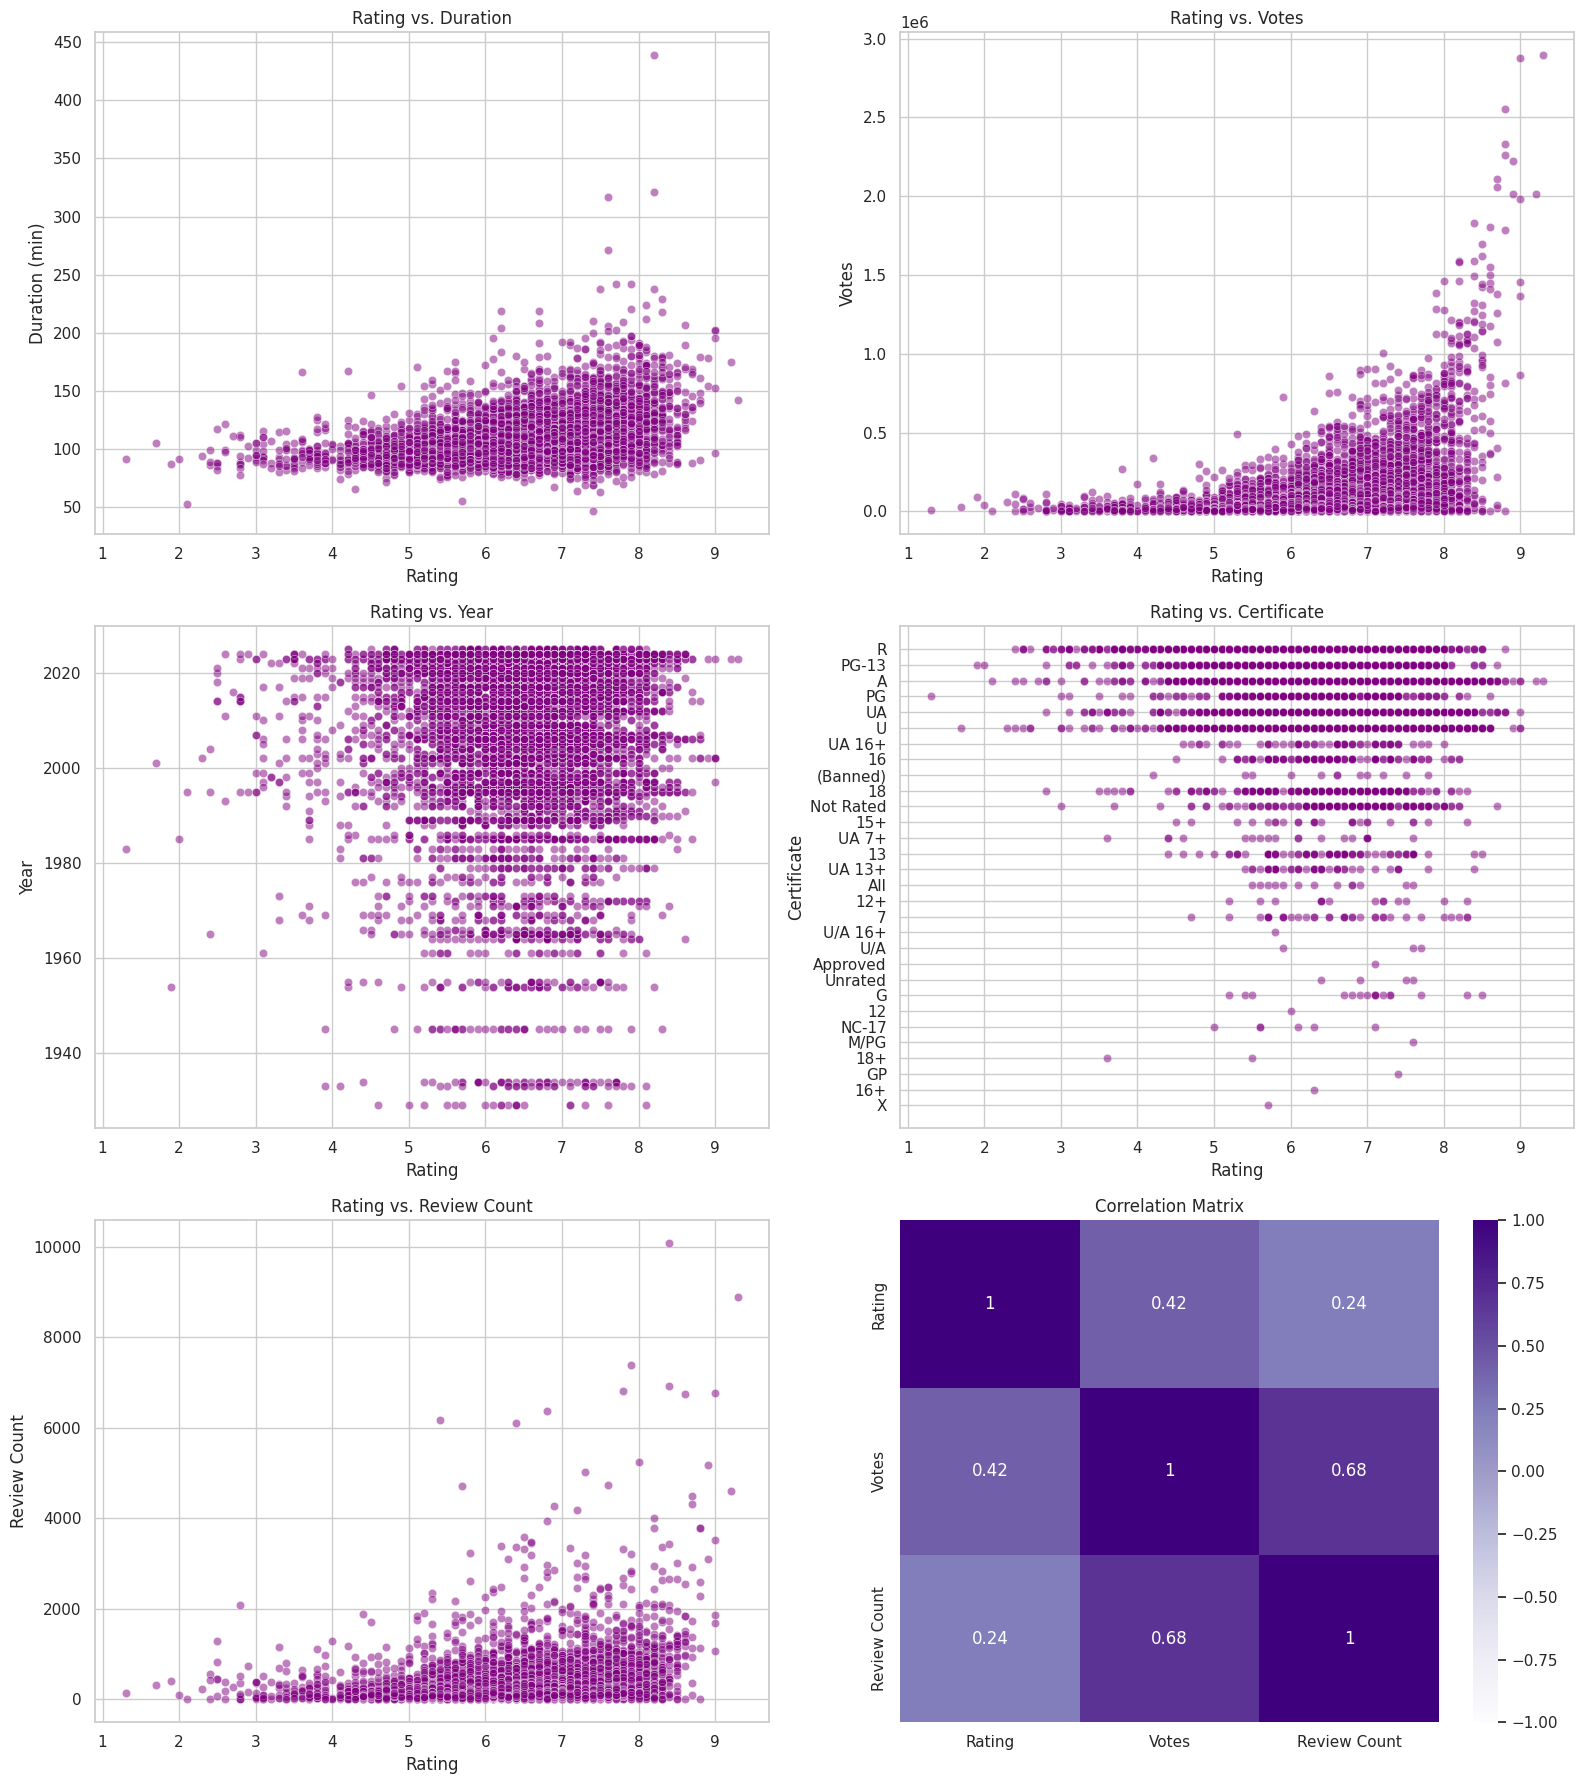

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

sns.scatterplot(x=df['Rating'], y=df['Duration (min)'], alpha=0.5, ax=axes[0, 0], color='purple')
axes[0, 0].set_title('Rating vs. Duration')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Duration (min)')
axes[0, 0].grid(True)


sns.scatterplot(x=df['Rating'], y=df['Votes'], alpha=0.5, ax=axes[0, 1], color='purple')
axes[0, 1].set_title('Rating vs. Votes')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Votes')
axes[0, 1].grid(True)


sns.scatterplot(x=df['Rating'], y=df['Year'], alpha=0.5, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Rating vs. Year')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Year')
axes[1, 0].grid(True)


sns.scatterplot(x=df['Rating'], y=df['Certificate'], alpha=0.5, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Rating vs. Certificate')
axes[1, 1].set_xlabel('Rating')
axes[1, 1].set_ylabel('Certificate')
axes[1, 1].grid(True)


sns.scatterplot(x=df['Rating'], y=df['Review Count'], alpha=0.5, ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Rating vs. Review Count')
axes[2, 0].set_xlabel('Rating')
axes[2, 0].set_ylabel('Review Count')
axes[2, 0].grid(True)


numeric_features = df[['Rating', 'Votes', 'Review Count']]
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, ax=axes[2, 1], cmap='Purples')
axes[2, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

####Distribution of Movies Released by year

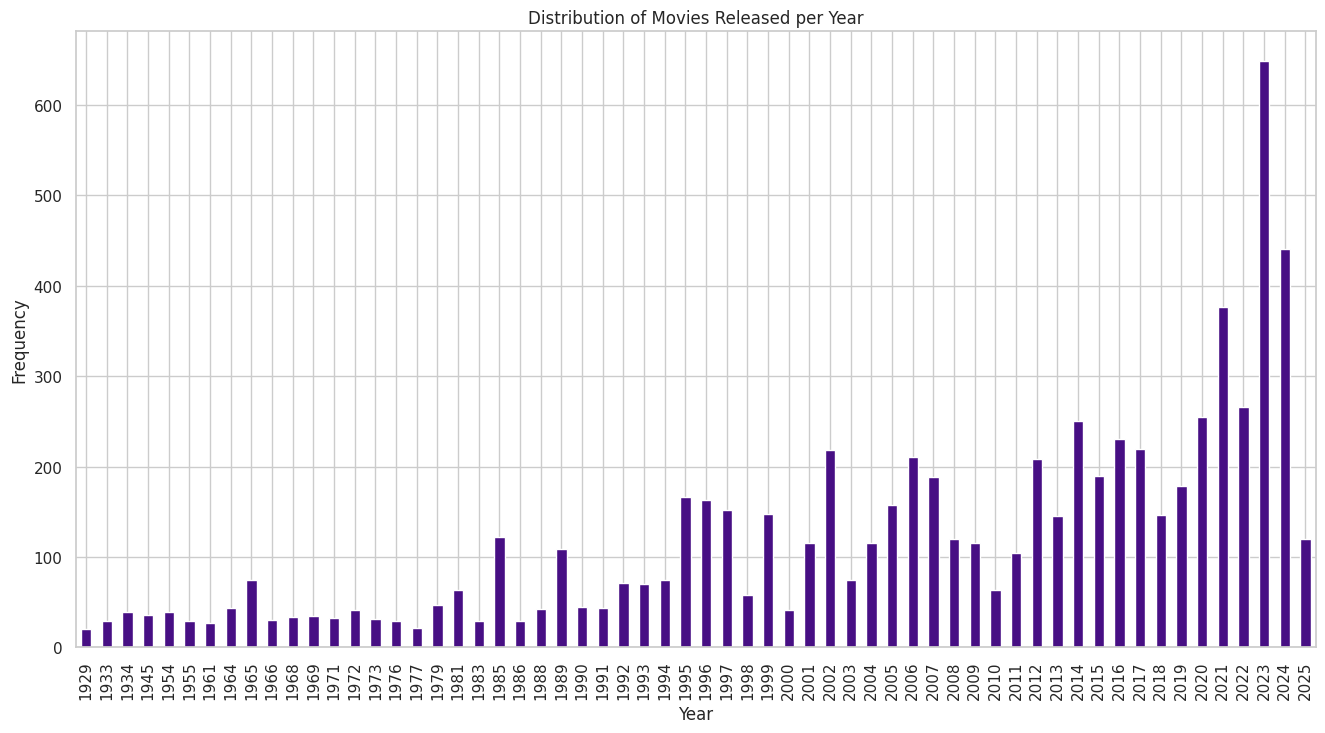

In [ ]:
years = df["Year"].unique()
years.sort()

colors = sns.color_palette("Purples", len(years))

color_mapping = {year: colors[i] for i, year in enumerate(years)}

bar_colors = df["Year"].map(color_mapping)

Freq = df["Year"].value_counts().sort_index().plot(
    kind="bar",
    title="Distribution of Movies Released per Year",
    figsize=(16, 8),
    color=bar_colors
)

Freq.set_xlabel("Year")
Freq.set_ylabel("Frequency")
plt.grid(True, axis='y')
plt.show()

####Distribution of Rating

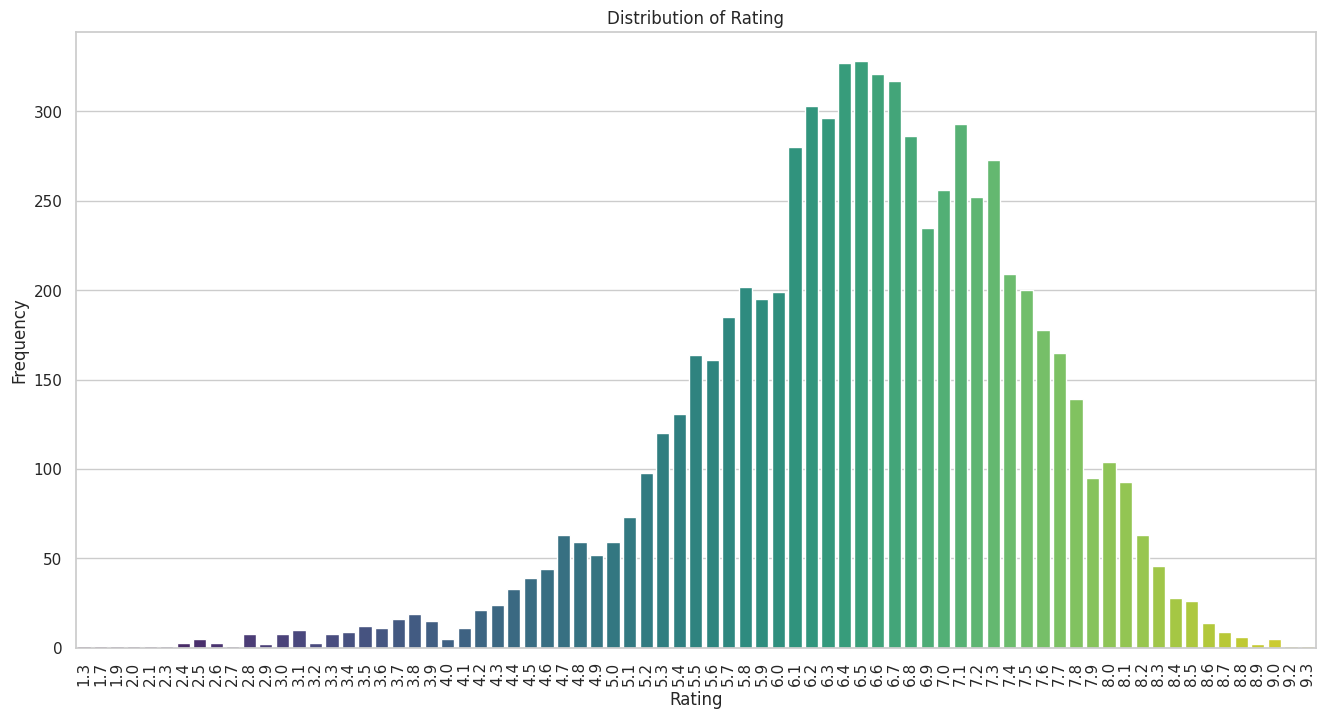

In [ ]:
Distribution_Rating = df['Rating'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')
plt.title("Distribution of Rating")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

####Top 20 Years by Average Rating

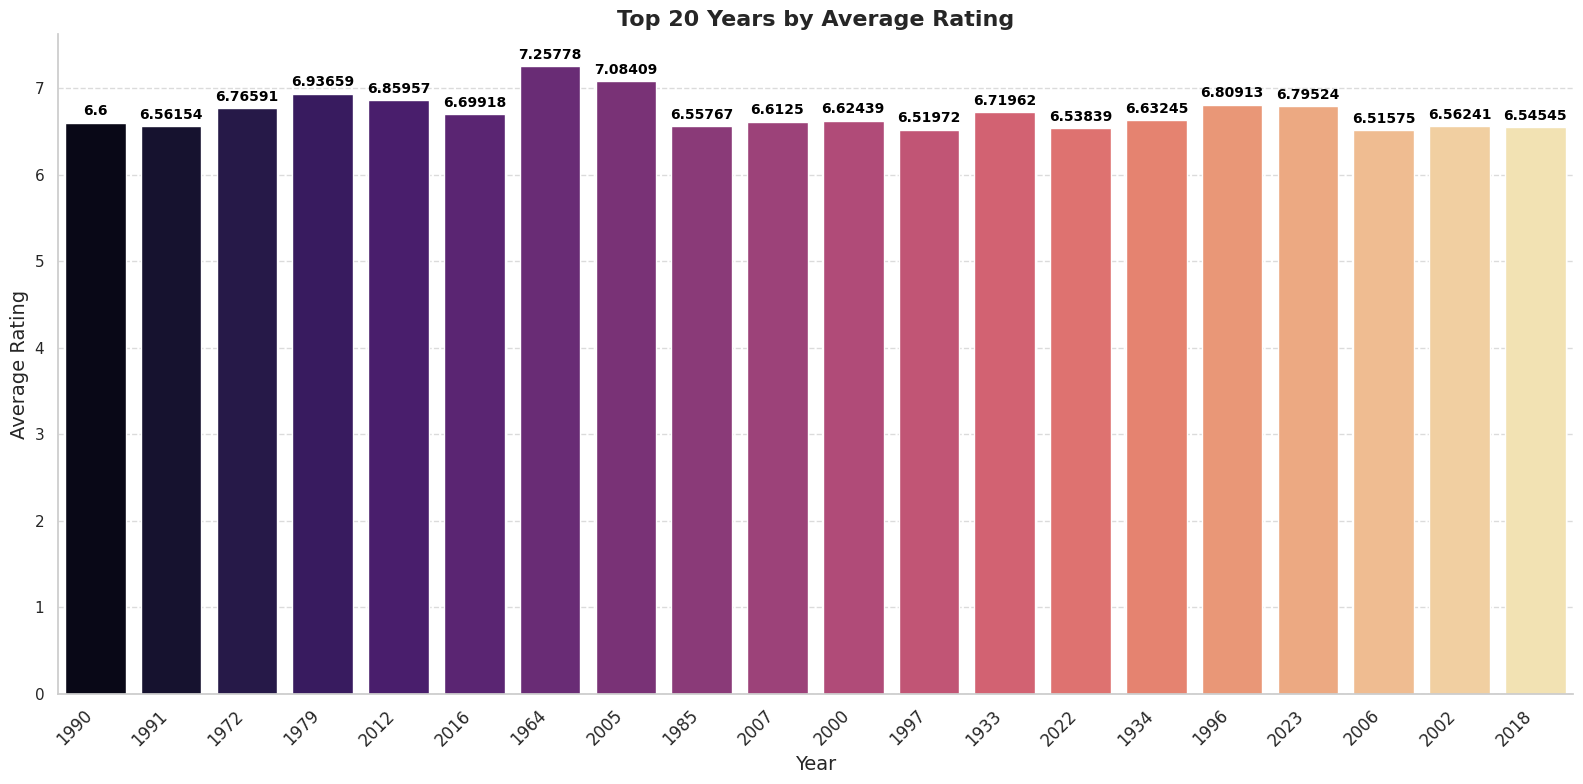

In [ ]:
fig, axes = plt.subplots(figsize=(16, 8))
grouped = df.groupby("Year")
mean = pd.DataFrame(grouped["Rating"].mean())
mean1 = mean.sort_values("Rating", ascending=False).head(20)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1.index, y=mean1["Rating"], ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xticklabels(mean1.index, rotation=45, ha='right', fontsize=12)

axes.set_xlabel('Year', fontsize=14)
axes.set_ylabel('Average Rating', fontsize=14)
axes.set_title('Top 20 Years by Average Rating', fontsize=16, weight='bold')

axes.grid(True, axis='y', linestyle='--', alpha=0.7)

sns.despine()

sns.set(style="darkgrid")

plt.tight_layout()
plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:#F4D03F ; overflow:hidden"><b>Top 20 Movies Most Rated </b></div>

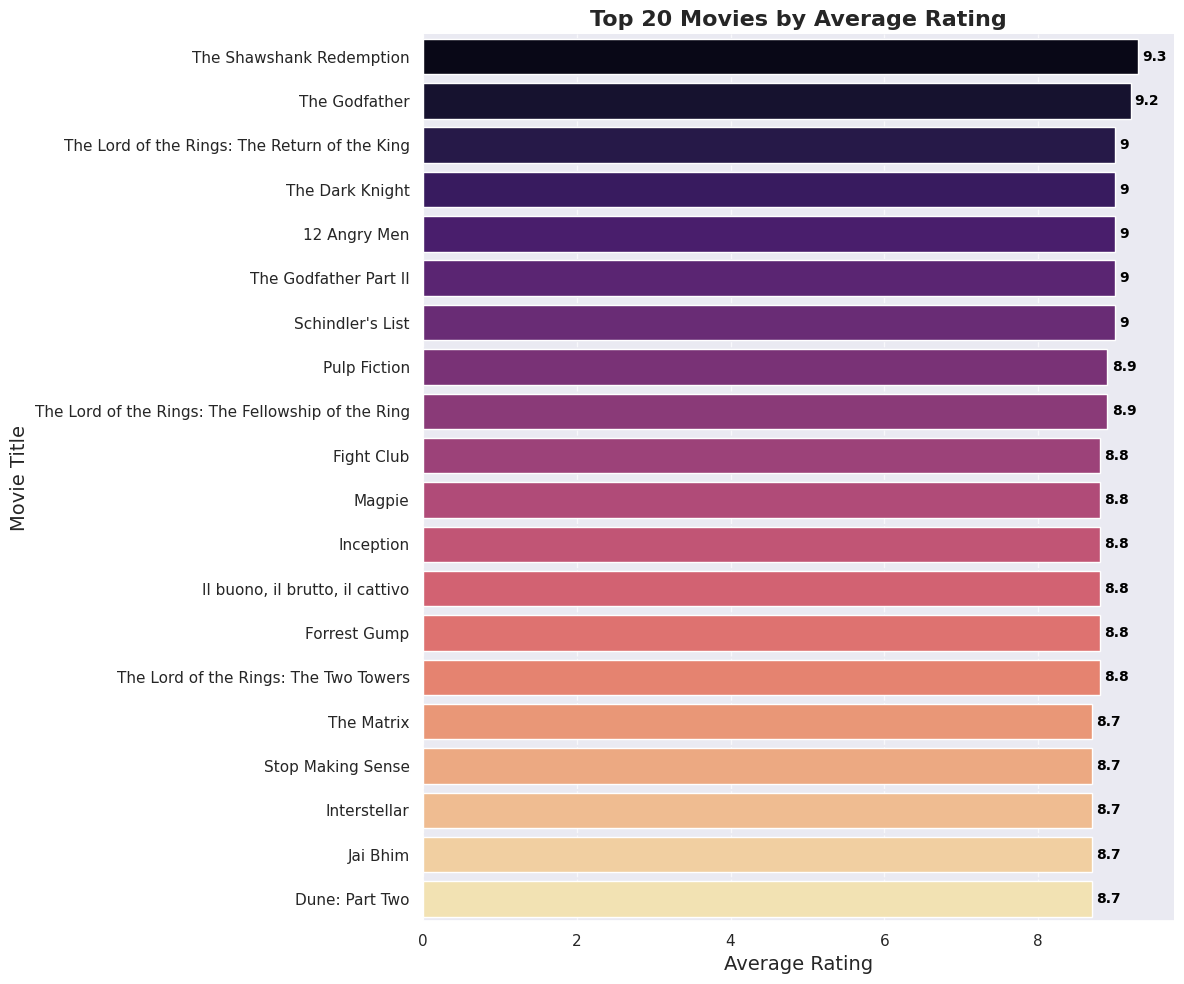

In [ ]:
sns.set(style="darkgrid")

fig, axes = plt.subplots(figsize=(12, 10))
grouped = df.groupby("Title")
mean = pd.DataFrame(grouped["Rating"].mean())
mean1 = mean.sort_values("Rating", ascending=False).head(20)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')


axes.set_xlabel('Average Rating', fontsize=14)
axes.set_ylabel('Movie Title', fontsize=14)
axes.set_title('Top 20 Movies by Average Rating', fontsize=16, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine()

plt.tight_layout()
plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:#F4D03F ; overflow:hidden"><b>Top 20 Movies Most Voted</b></div>

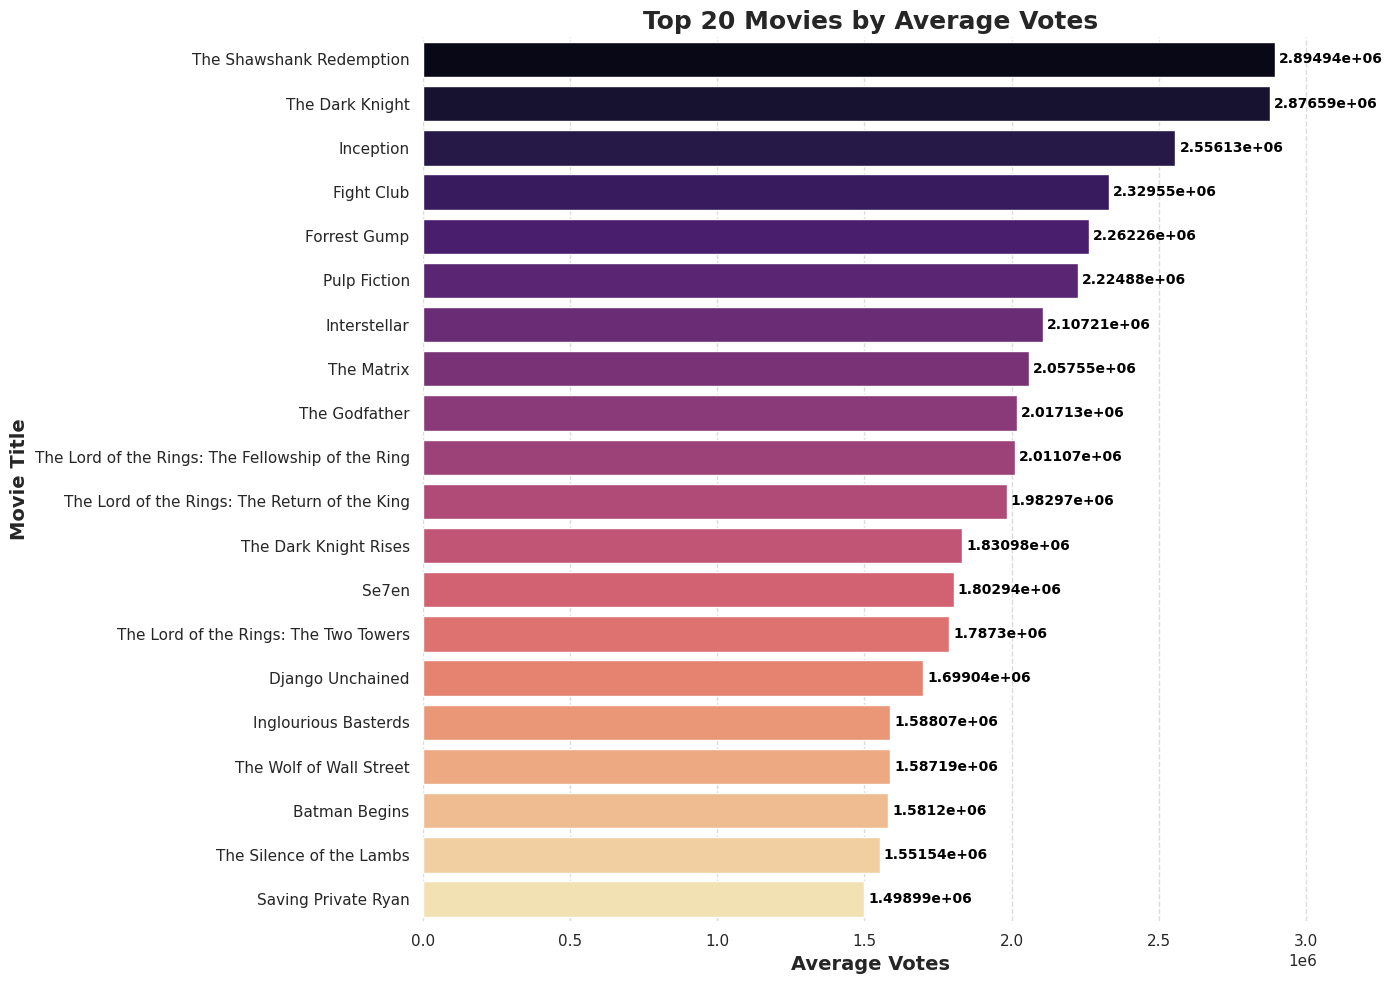

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(figsize=(14, 10))
grouped = df.groupby("Title")
mean = pd.DataFrame(grouped["Votes"].mean())
mean1 = mean.sort_values("Votes", ascending=False).head(20)

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Votes"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Votes', fontsize=14, weight='bold')
axes.set_ylabel('Movie Title', fontsize=14, weight='bold')
axes.set_title('Top 20 Movies by Average Votes', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:#F4D03F ; overflow:hidden"><b>Top 20 Movies by Review Count</b></div>

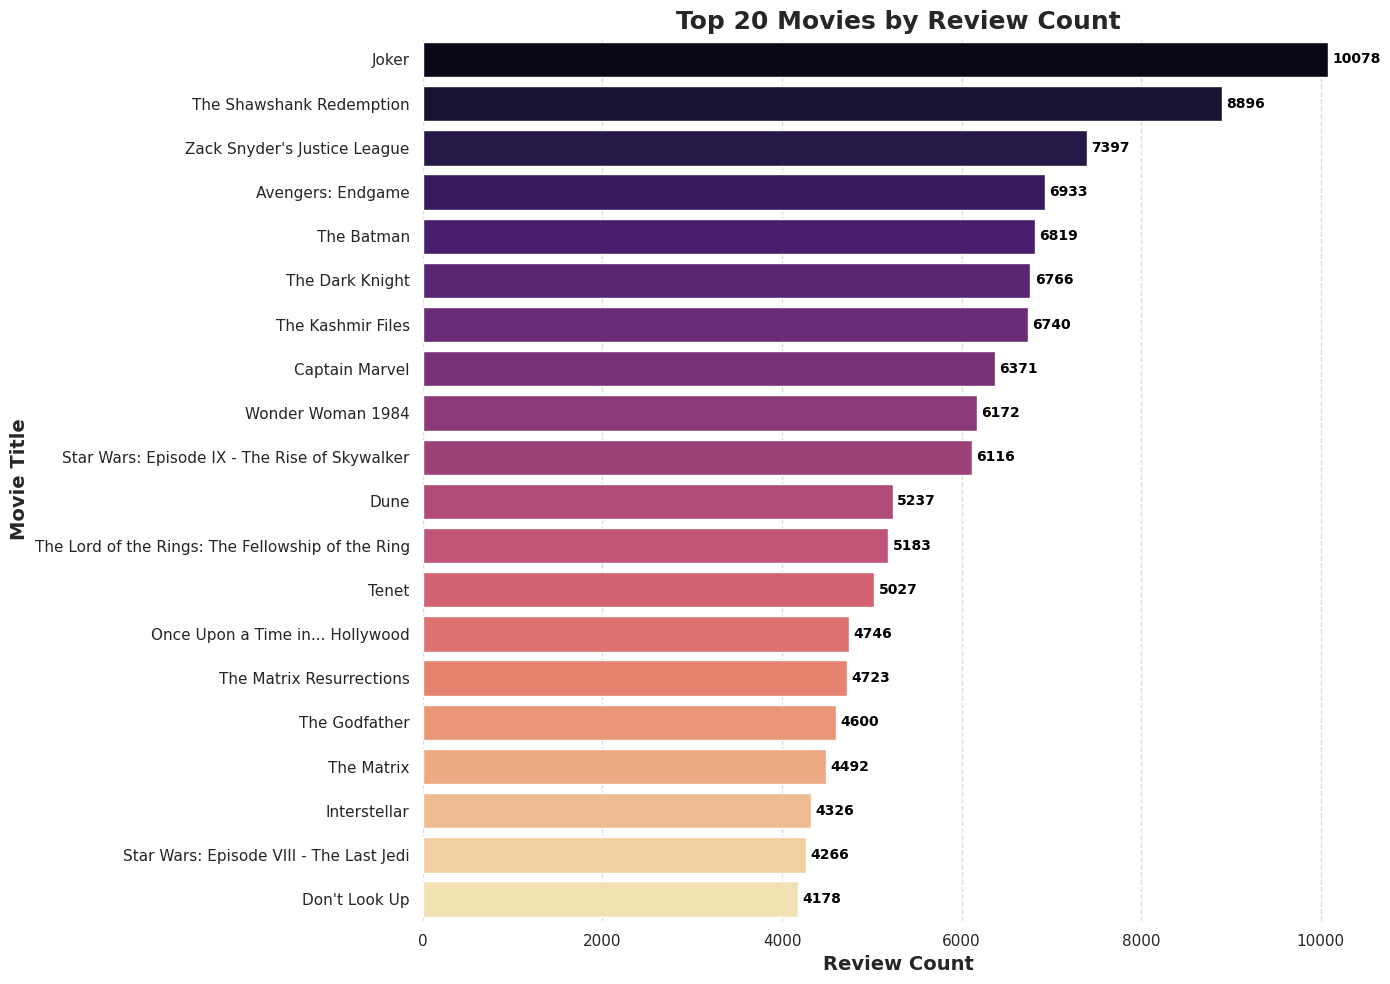

In [ ]:
temp = df[["Title", "Review Count"]].copy()
temp = temp.sort_values("Review Count", ascending=False).head(20)

sns.set(style="whitegrid")

fig, axes = plt.subplots(figsize=(14, 10))

palette = sns.color_palette("magma", len(temp))

sns.barplot(x="Review Count", y="Title", data=temp, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Review Count', fontsize=14, weight='bold')
axes.set_ylabel('Movie Title', fontsize=14, weight='bold')
axes.set_title('Top 20 Movies by Review Count', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

####Top 20 Directors by Number of Movies

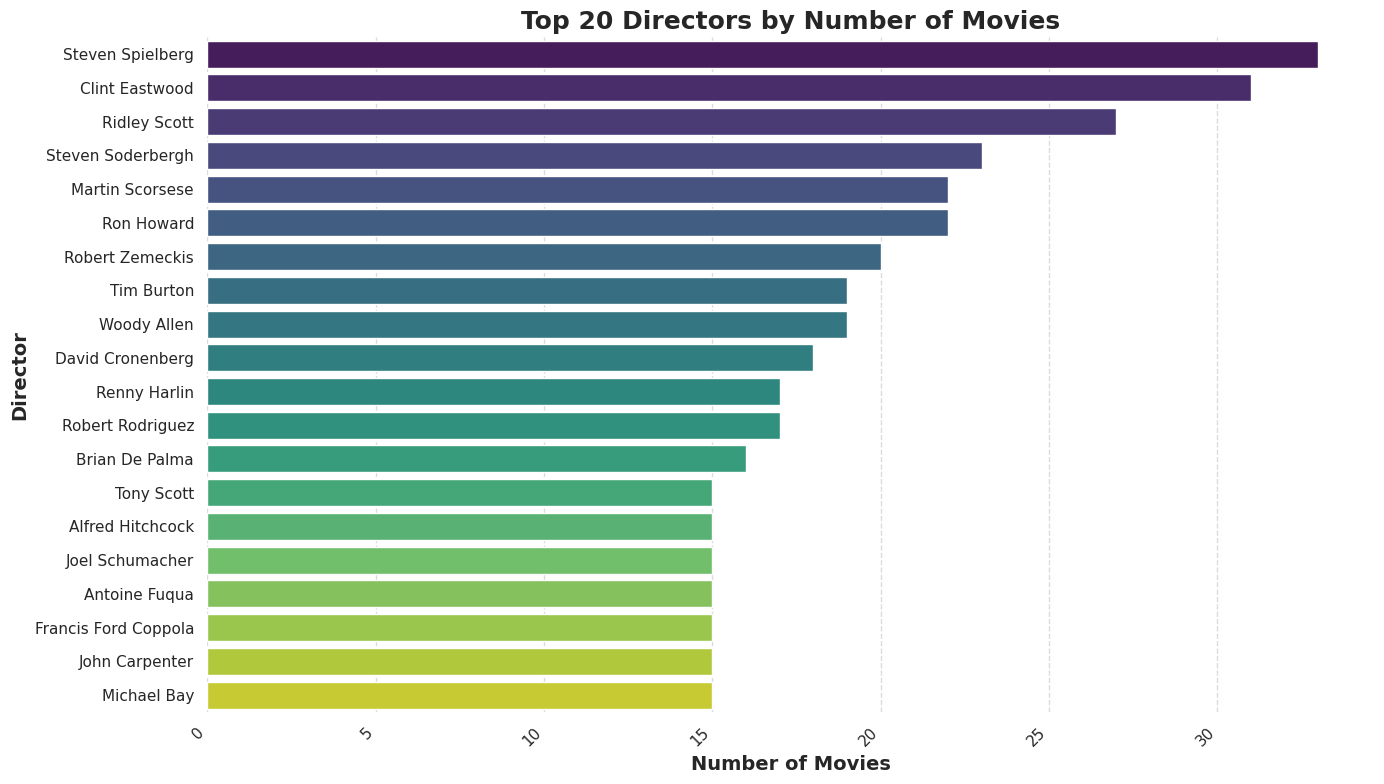

,count
Director,
Steven Spielberg,33
Clint Eastwood,31
Ridley Scott,27
Steven Soderbergh,23
Martin Scorsese,22
Ron Howard,22
Robert Zemeckis,20
Tim Burton,19
Woody Allen,19


In [ ]:
top_directors = df['Director'].value_counts().head(20)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

palette = sns.color_palette("viridis", len(top_directors))

sns.barplot(x=top_directors.values, y=top_directors.index, palette=palette)

plt.title('Top 20 Directors by Number of Movies', fontsize=18, weight='bold')
plt.xlabel('Number of Movies', fontsize=14, weight='bold')
plt.ylabel('Director', fontsize=14, weight='bold')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.xticks(rotation=45, ha='right')

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

top_directors

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:#F4D03F ; overflow:hidden"><b>Top 20 Directors Most Rated </b></div>

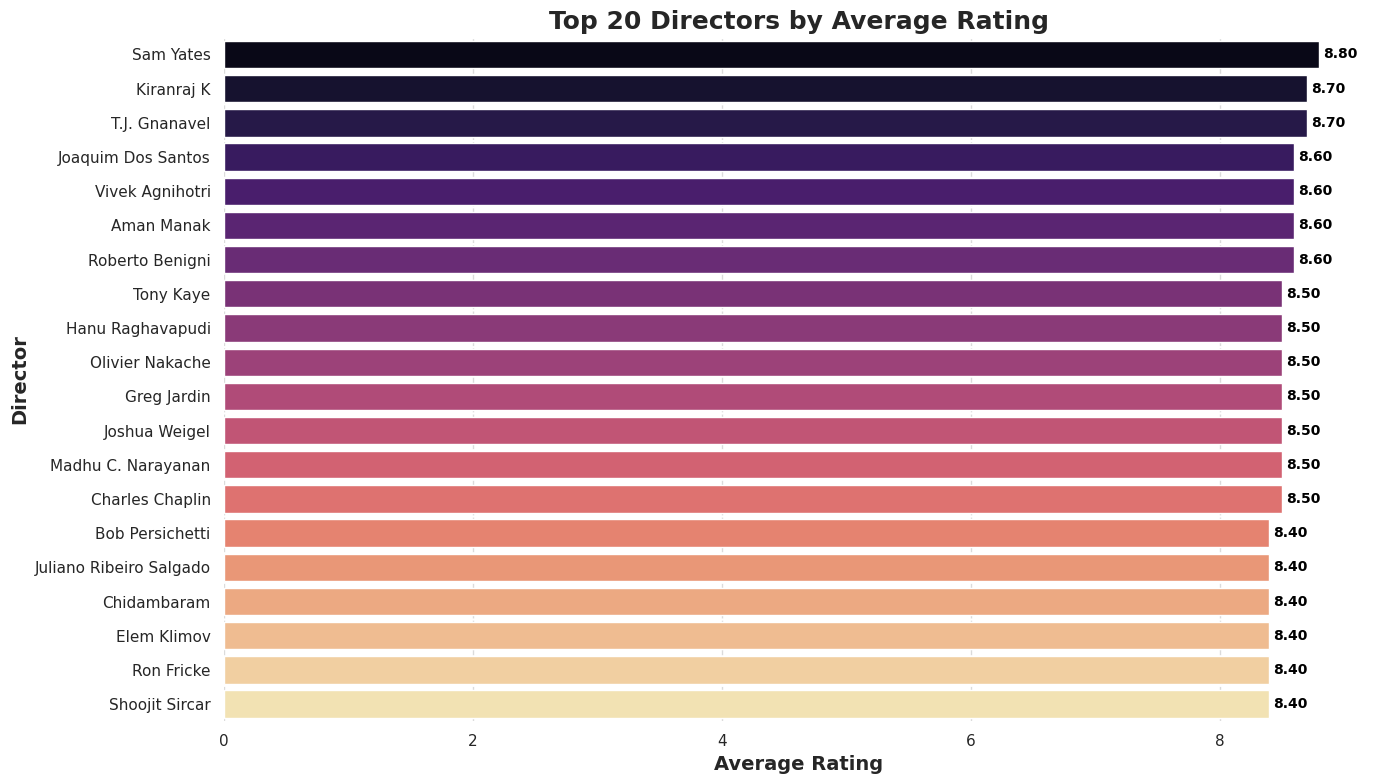

In [ ]:
fig, axes = plt.subplots(figsize=(14, 8))
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Rating"].mean())
mean1 = mean.sort_values("Rating", ascending=False).head(20)

sns.set(style="whitegrid")

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Rating"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, fmt="%.2f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Rating', fontsize=14, weight='bold')
axes.set_ylabel('Director', fontsize=14, weight='bold')
axes.set_title('Top 20 Directors by Average Rating', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:#F4D03F ; overflow:hidden"><b>Top 20 Directors Most Voted</b></div>

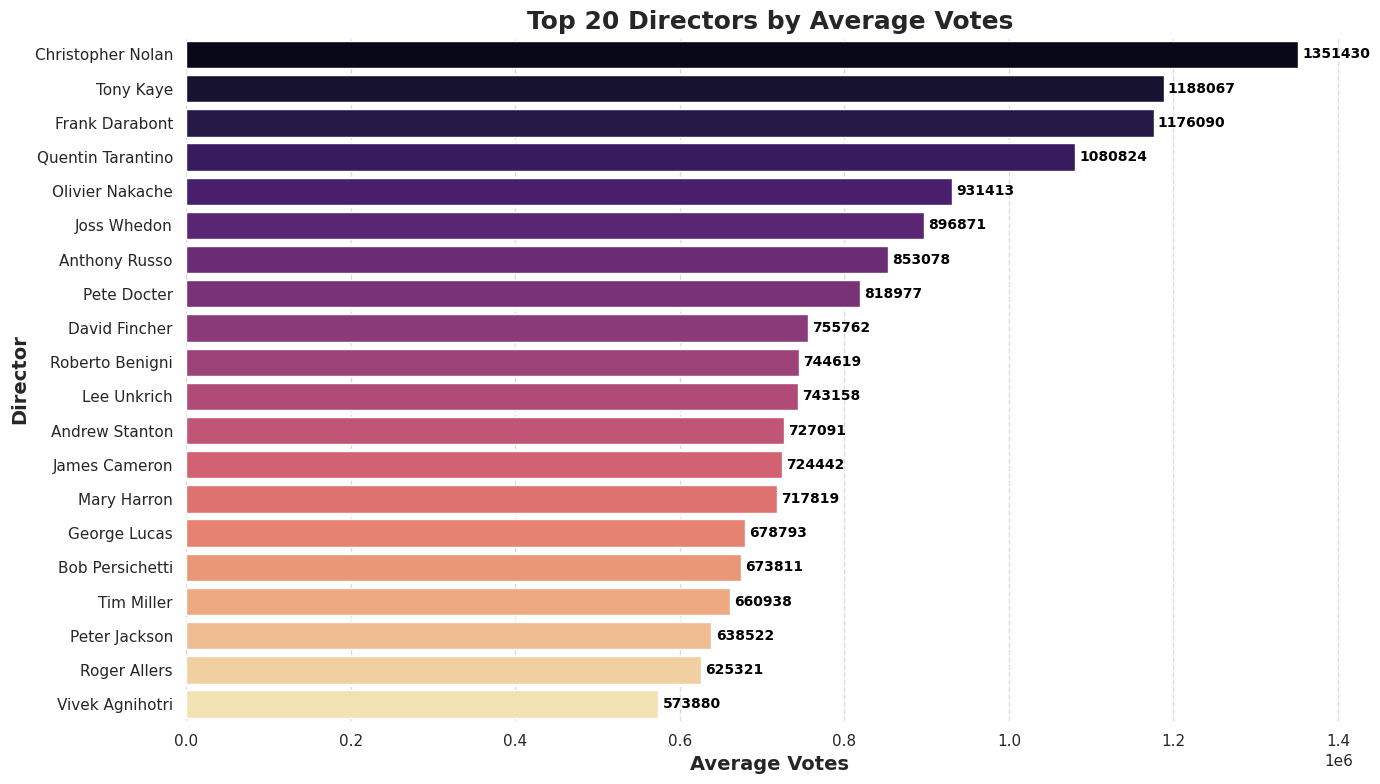

In [ ]:
fig, axes = plt.subplots(figsize=(14, 8))
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Votes"].mean())
mean1 = mean.sort_values("Votes", ascending=False).head(20)

sns.set(style="whitegrid")

palette = sns.color_palette("magma", len(mean1))

sns.barplot(x=mean1["Votes"], y=mean1.index, ax=axes, palette=palette)

for container in axes.containers:
    axes.bar_label(container, fmt="%.0f", label_type="edge", padding=3, fontsize=10, color='black', weight='bold')

axes.set_xlabel('Average Votes', fontsize=14, weight='bold')
axes.set_ylabel('Director', fontsize=14, weight='bold')
axes.set_title('Top 20 Directors by Average Votes', fontsize=18, weight='bold')

axes.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:#F4D03F ; overflow:hidden"><b>Number of Movies by Certificate</b></div>

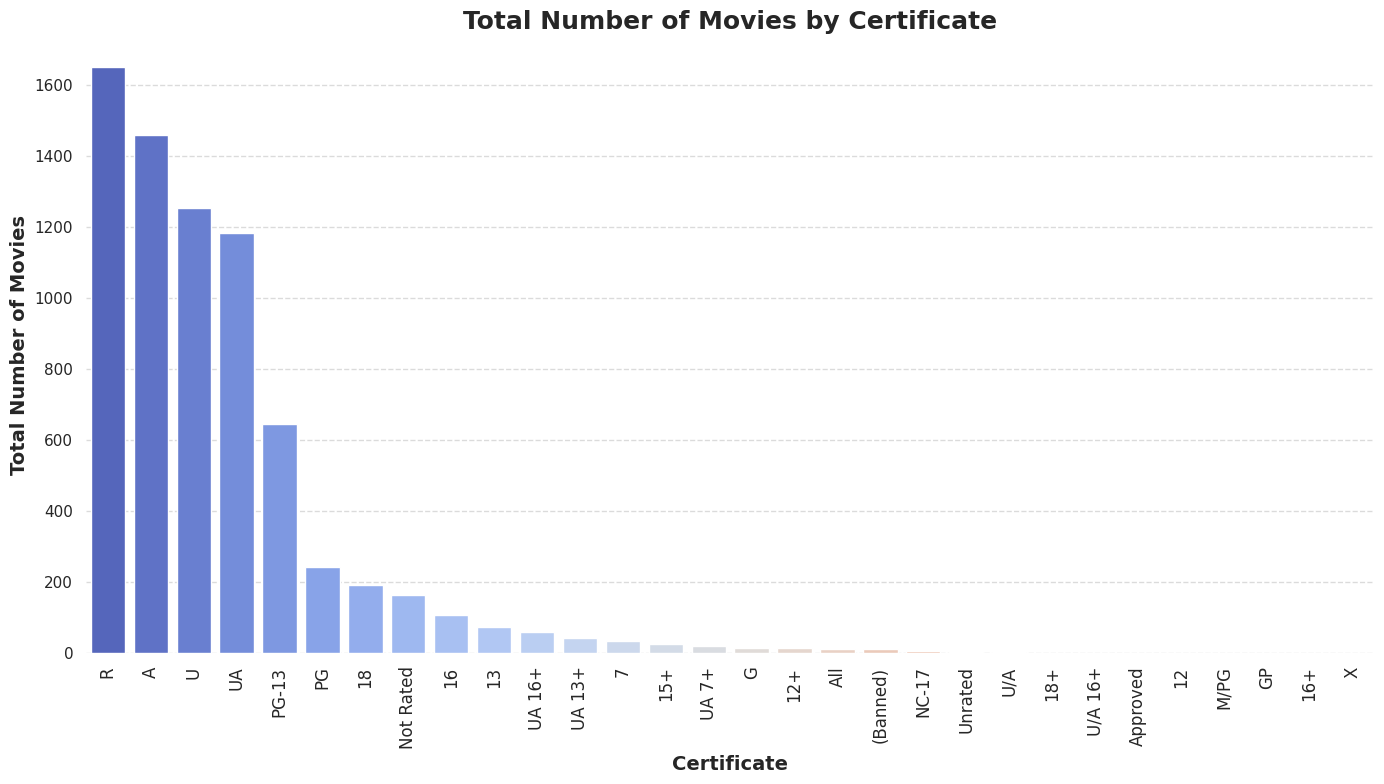

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

palette = sns.color_palette("coolwarm", len(df['Certificate'].unique()))

sns.countplot(data=df, x='Certificate', order=df['Certificate'].value_counts().index, palette=palette)

plt.title('Total Number of Movies by Certificate', fontsize=18, weight='bold')
plt.xlabel('Certificate', fontsize=14, weight='bold')
plt.ylabel('Total Number of Movies', fontsize=14, weight='bold')

plt.xticks(rotation=90, fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:black; margin:0; font-size:100%; font-family:Pacifico; background-color:#F4D03F ; overflow:hidden"><b>Top 20 Actors by Number of Movies</b></div>

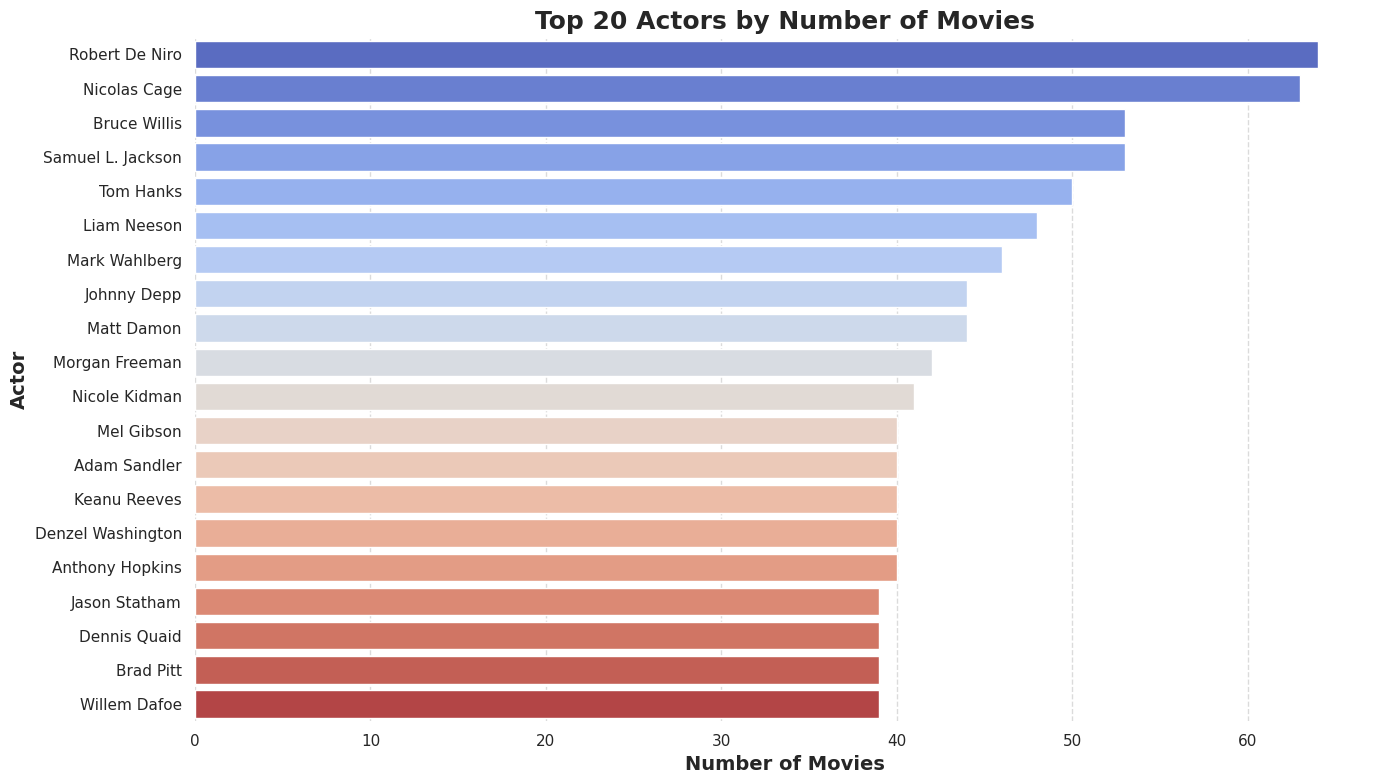

,count
Robert De Niro,64
Nicolas Cage,63
Bruce Willis,53
Samuel L. Jackson,53
Tom Hanks,50
Liam Neeson,48
Mark Wahlberg,46
Johnny Depp,44
Matt Damon,44
Morgan Freeman,42


In [ ]:
cast_series = df['Cast'].dropna().apply(lambda x: x.split(', '))
actors = [actor for sublist in cast_series for actor in sublist]
actor_counts = pd.Series(actors).value_counts().head(20)

sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

palette = sns.color_palette("coolwarm", len(actor_counts))

sns.barplot(x=actor_counts.values, y=actor_counts.index, palette=palette)

plt.title('Top 20 Actors by Number of Movies', fontsize=18, weight='bold')
plt.xlabel('Number of Movies', fontsize=14, weight='bold')
plt.ylabel('Actor', fontsize=14, weight='bold')

plt.grid(True, axis='x', linestyle='--', alpha=0.7)

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

actor_counts

In [ ]:
df.shape

(7228, 10)

####Data Preprocessing

In [ ]:
df = pd.read_csv('/content/imdb-movies-dataset.csv')
df.shape

(10000, 15)

In [ ]:
df.describe()

,Year,Duration (min),Rating,Metascore
count,9850.000000,9664.000000,9596.000000,7555.000000
mean,2005.761421,108.809603,6.438610,58.068299
std,18.958005,23.159749,1.051412,17.845240
min,1929.000000,45.000000,1.300000,1.000000
25%,1997.000000,95.000000,5.800000,45.500000
50%,2012.000000,105.000000,6.500000,58.000000
75%,2021.000000,118.000000,7.200000,71.000000
max,2025.000000,746.000000,9.700000,100.000000


In [ ]:
df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [ ]:
df = df.drop(['Metascore', 'Review', 'Review Count', 'Votes'], axis=1)
df.shape

(10000, 11)

In [ ]:
df.isnull().sum()

,0
Poster,0
Title,0
Year,150
Certificate,2630
Duration (min),336
Genre,7
Rating,404
Director,5
Cast,39
Description,0


In [ ]:
df = df.dropna()


In [ ]:
df.shape

(7210, 11)

In [ ]:
from textblob import TextBlob
def review_sentiment(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    if polarity >= 0.1:
        return 'positive'
    elif polarity <= -0.1:
        return 'negative'
    else:
        return 'neutral'


In [ ]:
print(df.dtypes)

Poster             object
Title              object
Year              float64
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Director           object
Cast               object
Description        object
Review Title       object
dtype: object


In [ ]:
# import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from transformers import pipeline

# nltk.download('vader_lexicon')

# vader_analyzer = SentimentIntensityAnalyzer()

# emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# # Mapping Hugging Face emotions to custom emotions
# emotion_mapping = {
#     "joy": "Happy",
#     "love": "Romantic",
#     "sadness": "Sad",
#     "anger": "Disgust",
#     "fear": "Anxiety",
#     "surprise": "Excited",
#     "anticipation": "Motivational",
#     "trust": "Empathy",
#     "disgust": "Disgust"
# }

# # Additional custom emotions that are not directly mapped
# additional_emotions = {
#     "relief": "Relief",
#     "thrilling": "Thrilling"
# }

def detect_emotion(text):
    # Step 1: VADER Sentiment Analysis
    vader_scores = vader_analyzer.polarity_scores(text)
    compound_score = vader_scores['compound']

    # Step 2: Emotion Detection using Hugging Face model
    emotion_scores = emotion_classifier(text)[0]

    # Extract the emotion with the highest score
    dominant_emotion = max(emotion_scores, key=lambda x: x['score'])['label']

    # Step 3: Combine VADER sentiment and emotion detection
    if compound_score >= 0.5:
        sentiment = "Positive"
    elif compound_score <= -0.5:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    # Step 4: Map the detected emotion to the custom emotion set
    if dominant_emotion in emotion_mapping:
        final_emotion = emotion_mapping[dominant_emotion]
    else:
        # If the emotion is not in the mapping, use the dominant emotion directly
        final_emotion = dominant_emotion.capitalize()

    # Step 5: Adjust based on sentiment and additional custom emotions
    if sentiment == "Positive" and dominant_emotion in ["joy", "love"]:
        final_emotion = "Happy"
    elif sentiment == "Negative" and dominant_emotion in ["sadness", "fear"]:
        final_emotion = "Sad"
    elif sentiment == "Neutral" and dominant_emotion in ["surprise", "anticipation"]:
        final_emotion = "Excited"

    # Handle additional custom emotions
    if "relief" in text.lower():
        final_emotion = "Relief"
    elif "thrill" in text.lower() or "exciting" in text.lower():
        final_emotion = "Thrilling"

    return final_emotion

In [ ]:
# emotion = detect_emotion('The British military recruits a small group of highly skilled soldiers to strike against German forces behind enemy lines during World War II.')
# print(emotion)

In [ ]:
df['Review Title'] = df['Review Title'].fillna('')
df['Review Title'] = df['Review Title'].astype(str)
df['Review Title'] = df['Review Title'].str.lower()
df['Review Sentiment'] = df['Review Title'].apply(review_sentiment)
df.shape

(7210, 12)

In [ ]:

df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Director,Cast,Description,Review Title,Review Sentiment
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","Solène, a 40-year-old single mom, begins an un...",hypocrisy as an idea,neutral
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","Many years after the reign of Caesar, a young ...",a phenomenal start to another trilogy!,positive
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","In 1963 Michigan, business rivals Kellogg's an...",not funny,negative
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",A down-and-out stuntman must find the missing ...,everything you needed and more!,positive
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","Tashi, a former tennis prodigy turned coach, t...","watch ""match point"" instead",neutral


In [ ]:
df['Description'] = df['Description'].fillna('')
df['Description'] = df['Description'].astype(str)
df['Description'] = df['Description'].str.lower()
df['Description Sentiment'] = df['Description'].apply(review_sentiment)
df.shape

(7210, 13)

In [ ]:
df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Director,Cast,Description,Review Title,Review Sentiment,Description Sentiment
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","solène, a 40-year-old single mom, begins an un...",hypocrisy as an idea,neutral,neutral
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","many years after the reign of caesar, a young ...",a phenomenal start to another trilogy!,positive,neutral
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","in 1963 michigan, business rivals kellogg's an...",not funny,negative,neutral
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",a down-and-out stuntman must find the missing ...,everything you needed and more!,positive,negative
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","tashi, a former tennis prodigy turned coach, t...","watch ""match point"" instead",neutral,neutral


In [ ]:
def sorting_the_attribute(row , attribute):

    text_list = getattr(row , attribute).split(', ')

      # text_list = row.Genre.split(', ')
    text_list.sort()
    return ', '.join(text_list)


In [ ]:
df.Cast = df.apply(lambda row: sorting_the_attribute(row , 'Cast'), axis=1)
df.Genre = df.apply(lambda row : sorting_the_attribute(row , 'Genre'), axis=1)

In [ ]:
df.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Director,Cast,Description,Review Title,Review Sentiment,Description Sentiment
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Annie Mumolo, Ella Rubin, Nicho...","solène, a 40-year-old single mom, begins an un...",hypocrisy as an idea,neutral,neutral
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Freya Allan, Kevin Durand, Owen Teague, Peter ...","many years after the reign of caesar, a young ...",a phenomenal start to another trilogy!,positive,neutral
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Chris Rickett, Isaac Bae, Jerry Seinfeld, Rach...","in 1963 michigan, business rivals kellogg's an...",not funny,negative,neutral
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,David Leitch,"Aaron Taylor-Johnson, Emily Blunt, Hannah Wadd...",a down-and-out stuntman must find the missing ...,everything you needed and more!,positive,negative
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,Luca Guadagnino,"Darnell Appling, Josh O'Connor, Mike Faist, Ze...","tashi, a former tennis prodigy turned coach, t...","watch ""match point"" instead",neutral,neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7210 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Poster                 7210 non-null   object 
 1   Title                  7210 non-null   object 
 2   Year                   7210 non-null   float64
 3   Certificate            7210 non-null   object 
 4   Duration (min)         7210 non-null   float64
 5   Genre                  7210 non-null   object 
 6   Rating                 7210 non-null   float64
 7   Director               7210 non-null   object 
 8   Cast                   7210 non-null   object 
 9   Description            7210 non-null   object 
 10  Review Title           7210 non-null   object 
 11  Review Sentiment       7210 non-null   object 
 12  Description Sentiment  7210 non-null   object 
dtypes: float64(3), object(10)
memory usage: 788.6+ KB


###Create movie Descriptions

In [ ]:
def create_movie_dict(row):
    return {
        "Certificate": row["Certificate"],
        "Year": row["Year"],
        "Duration": row["Duration (min)"],
        "Genre": row["Genre"],
        "Cast": row["Cast"],
        "Director": row["Director"]
    }

In [ ]:
#here we are creating the movie description attribute for getting and comparing for the similar movies

# df["movie_describe"] = df.apply(create_movie_dict, axis=1)
df["movie_describe"] = "Certificate: " + df["Certificate"] + ". Year: " + df["Year"].astype(str) + ". Duration: " + df["Duration (min)"].astype(str) + ". Genre: " + df["Genre"] + ". Cast: " + df["Cast"] + ". Director: " + df["Director"] + ". Description Sentiment: " + df["Description Sentiment"] + ". Review Sentiment: " + df["Review Sentiment"] + "."


In [ ]:
required_df = df[["Title", "movie_describe"]].copy()
required_df.head()

,Title,movie_describe
0,The Idea of You,Certificate: R. Year: 2023.0. Duration: 115.0....
1,Kingdom of the Planet of the Apes,Certificate: PG-13. Year: 2023.0. Duration: 14...
2,Unfrosted,Certificate: PG-13. Year: 2023.0. Duration: 97...
3,The Fall Guy,Certificate: PG-13. Year: 2023.0. Duration: 12...
4,Challengers,Certificate: R. Year: 2023.0. Duration: 131.0....


Lower the text

In [ ]:
required_df["Title"] = required_df["Title"].str.lower()
required_df["movie_describe"] = required_df["movie_describe"].str.lower()

Vectorizing the text

In [ ]:
cv = CountVectorizer(max_features=5000, stop_words='english')
vector = cv.fit_transform(required_df["movie_describe"]).toarray()

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
required_df.reset_index(inplace=True)
required_df.drop("index", axis=1, inplace=True)
required_df.head()

,Title,movie_describe
0,the idea of you,certificate: r. year: 2023.0. duration: 115.0....
1,kingdom of the planet of the apes,certificate: pg-13. year: 2023.0. duration: 14...
2,unfrosted,certificate: pg-13. year: 2023.0. duration: 97...
3,the fall guy,certificate: pg-13. year: 2023.0. duration: 12...
4,challengers,certificate: r. year: 2023.0. duration: 131.0....


In [ ]:
def similar_movie(name):
    name = name.lower()
    indices = required_df[required_df["Title"] == name].index[0]
    distances = similarity[indices]
    arr = sorted(list(enumerate(distances)), reverse = True, key=lambda x: x[1])[1:6]
    # print(arr)

    print("Similar movies:")
    print()
    # row = 1
    for j, i in enumerate(arr):
        print("Recommended movie number {}: ".format(j+1))
        title = required_df.loc[i[0], "Title"]
        desc = required_df.loc[i[0], "movie_describe"]
        print(title.capitalize())
        print(desc)
        print("\n")
        # row += 1

In [ ]:
df.shape

(7210, 14)

In [ ]:
print("Movies similar to '{}'".format(df.iloc[222,1]))
# similar_movie(df.iloc[222, 1])

similar_movie("Avengers: Endgame")

Movies similar to 'Hellboy'
Similar movies:

Recommended movie number 1: 
Avengers: infinity war
certificate: ua. year: 2007.0. duration: 149.0. genre: action, adventure, sci-fi. cast: chris evans, chris hemsworth, joe russo, mark ruffalo, robert downey jr.. director: anthony russo. description sentiment: positive. review sentiment: positive.


Recommended movie number 2: 
Avengers: age of ultron
certificate: ua. year: 2012.0. duration: 141.0. genre: action, adventure, sci-fi. cast: chris evans, chris hemsworth, mark ruffalo, robert downey jr.. director: joss whedon. description sentiment: negative. review sentiment: negative.


Recommended movie number 3: 
Captain america: civil war
certificate: ua. year: 2018.0. duration: 147.0. genre: action, sci-fi. cast: chris evans, joe russo, robert downey jr., scarlett johansson, sebastian stan. director: anthony russo. description sentiment: neutral. review sentiment: positive.


Recommended movie number 4: 
Captain america: the winter soldier

In [ ]:
# df_temp = pd.read_csv('/content/imdb-movies-dataset.csv')
# df_temp.isnull().sum()
# df_temp = df_temp.drop(['Metascore', 'Review', 'Review Count', 'Votes'], axis=1)
# df_temp.shape
# df_temp = df_temp.dropna()
# df_temp.shape

(7210, 11)

In [ ]:
# df['Poster'] = df_temp['Poster']
# df.head()

,Title,Year,Certificate,Duration (min),Genre,Rating,Director,Cast,Description,Review Title,Review Sentiment,Description Sentiment,movie_describe,Poster
0,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,Michael Showalter,"Anne Hathaway, Annie Mumolo, Ella Rubin, Nicho...","solène, a 40-year-old single mom, begins an un...",hypocrisy as an idea,neutral,neutral,Certificate: R. Year: 2023.0. Duration: 115.0....,https://m.media-amazon.com/images/M/MV5BYWRkZj...
1,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,Wes Ball,"Freya Allan, Kevin Durand, Owen Teague, Peter ...","many years after the reign of caesar, a young ...",a phenomenal start to another trilogy!,positive,neutral,Certificate: PG-13. Year: 2023.0. Duration: 14...,https://m.media-amazon.com/images/M/MV5BZGI4NT...
2,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,Jerry Seinfeld,"Chris Rickett, Isaac Bae, Jerry Seinfeld, Rach...","in 1963 michigan, business rivals kellogg's an...",not funny,negative,neutral,Certificate: PG-13. Year: 2023.0. Duration: 97...,https://m.media-amazon.com/images/M/MV5BZjIyOT...
3,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,David Leitch,"Aaron Taylor-Johnson, Emily Blunt, Hannah Wadd...",a down-and-out stuntman must find the missing ...,everything you needed and more!,positive,negative,Certificate: PG-13. Year: 2023.0. Duration: 12...,https://m.media-amazon.com/images/M/MV5BMjA5Zj...
4,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,Luca Guadagnino,"Darnell Appling, Josh O'Connor, Mike Faist, Ze...","tashi, a former tennis prodigy turned coach, t...","watch ""match point"" instead",neutral,neutral,Certificate: R. Year: 2023.0. Duration: 131.0....,https://m.media-amazon.com/images/M/MV5BNTk1MT...


In [ ]:
    # name = name.lower()
    # indices = required_df[required_df["Title"] == name].index[0]
    # distances = similarity[indices]
    # arr = sorted(list(enumerate(distances)), reverse = True, key=lambda x: x[1])

from tqdm import tqdm

# saving only top 20 movie index insted of all similarity
similarity_top_20 = []

for i in tqdm(range(len(similarity))):
  temp = np.array(sorted(list(enumerate(similarity[i])),reverse=True, key= lambda x:x[1]))
  top_20_index = temp[:20,:1].reshape(-1,).astype('int')
  similarity_top_20.append(list(top_20_index))

100%|██████████| 7210/7210 [01:02<00:00, 116.16it/s]


In [ ]:
df[df['Title']=="Avengers: Endgame"].index[0]


array([0.47464445, 0.53362988, 0.41400434, ..., 0.5263968 , 0.4645821 ,
       0.48275862])

In [ ]:
# saving the required data to created webapp
import pickle

pickle.dump(df,open('movie_list.pkl', 'wb'))
pickle.dump(similarity_top_20, open('similarity.pkl', 'wb'))
